## Detect Autistic Spectrum Disorder(ASD) Cases
v.

In [1484]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [1485]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [1486]:
data = arff.loadarff('Autism-Adult-Data.arff')
data1 = pd.DataFrame(data[0])
data1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40.0,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [1487]:
data1.shape

(704, 21)

In [1488]:
df = data1.drop(['contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'], axis=1,) # removing the columns from dataset

In [1489]:
pd.set_option('display.max_columns', None)  # displaying all columns

In [1490]:
df.rename(columns = {'austim':'autism'}, inplace = True)  # renaming the dependent variable

In [1491]:
df = df[df.ethnicity != b'?']

In [1492]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes'
5,b'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',36.0,b'm',b'Others',b'yes',b'no'


In [1493]:
print(df.dtypes)

A1_Score      object
A2_Score      object
A3_Score      object
A4_Score      object
A5_Score      object
A6_Score      object
A7_Score      object
A8_Score      object
A9_Score      object
A10_Score     object
age          float64
gender        object
ethnicity     object
jundice       object
autism        object
dtype: object


In [1494]:
df.shape

(609, 15)

In [1495]:
for col in df:
  print(df[col].unique())

[b'1' b'0']
[b'1' b'0']
[b'1' b'0']
[b'1' b'0']
[b'0' b'1']
[b'0' b'1']
[b'1' b'0']
[b'1' b'0']
[b'0' b'1']
[b'0' b'1']
[ 26.  24.  27.  35.  36.  17.  64.  29.  33.  18.  31.  30.  42.  40.
  48.  37.  55.  50.  34.  53.  20.  28.  21. 383.  47.  43.  32.  44.
  19.  58.  22.  39.  25.  23.  38.  54.  60.  41.  46.  45.  56.  61.
  59.  52.  49.  51.]
[b'f' b'm']
[b'White-European' b'Latino' b'Others' b'Black' b'Asian'
 b'Middle Eastern ' b'Pasifika' b'South Asian' b'Hispanic' b'Turkish'
 b'others']
[b'no' b'yes']
[b'no' b'yes']


In [1496]:
df.isnull().sum() # checking for null values

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
ethnicity    0
jundice      0
autism       0
dtype: int64

### Encoding categorical data

Label Encoding the "gender", "jundice", "autism" columns

In [1497]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'jundice', 'autism']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,0,b'White-European',0,0
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,1,b'Latino',0,1
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,1,b'Latino',1,1


In [1498]:
df['A1_Score'].value_counts()

b'1'    451
b'0'    158
Name: A1_Score, dtype: int64

In [1499]:
df['A2_Score'].value_counts()

b'0'    323
b'1'    286
Name: A2_Score, dtype: int64

In [1500]:
df['A3_Score'].value_counts()

b'0'    316
b'1'    293
Name: A3_Score, dtype: int64

In [1501]:
df['A4_Score'].value_counts()

b'1'    317
b'0'    292
Name: A4_Score, dtype: int64

In [1502]:
df['A5_Score'].value_counts()

b'1'    320
b'0'    289
Name: A5_Score, dtype: int64

In [1503]:
df['A6_Score'].value_counts()

b'0'    422
b'1'    187
Name: A6_Score, dtype: int64

In [1504]:
df['A7_Score'].value_counts()

b'0'    348
b'1'    261
Name: A7_Score, dtype: int64

In [1505]:
df['A8_Score'].value_counts()

b'1'    405
b'0'    204
Name: A8_Score, dtype: int64

In [1506]:
df['A9_Score'].value_counts()

b'0'    401
b'1'    208
Name: A9_Score, dtype: int64

In [1507]:
df['A10_Score'].value_counts()

b'1'    364
b'0'    245
Name: A10_Score, dtype: int64

In [1508]:
df['gender'].value_counts()

1    321
0    288
Name: gender, dtype: int64

In [1509]:
df['ethnicity'].value_counts()

b'White-European'     233
b'Asian'              123
b'Middle Eastern '     92
b'Black'               43
b'South Asian'         36
b'Others'              30
b'Latino'              20
b'Hispanic'            13
b'Pasifika'            12
b'Turkish'              6
b'others'               1
Name: ethnicity, dtype: int64

In [1510]:
df['jundice'].value_counts()

0    550
1     59
Name: jundice, dtype: int64

In [1511]:
df['autism'].value_counts()

0    524
1     85
Name: autism, dtype: int64

In [1512]:
df['age'].value_counts()

23.0     33
22.0     33
21.0     32
20.0     31
24.0     31
18.0     31
27.0     29
30.0     27
25.0     26
29.0     26
26.0     25
19.0     24
28.0     22
31.0     19
35.0     17
40.0     15
37.0     15
42.0     15
33.0     15
17.0     14
32.0     14
36.0     13
34.0     11
38.0     11
43.0      9
44.0      9
39.0      7
47.0      6
55.0      6
53.0      6
46.0      6
50.0      4
48.0      4
49.0      3
45.0      3
52.0      3
41.0      2
61.0      2
54.0      2
58.0      2
59.0      1
383.0     1
56.0      1
60.0      1
64.0      1
51.0      1
Name: age, dtype: int64

In [1513]:
df['age'] = df['age'].fillna(0).astype(int)
df['age'].value_counts()

23     33
22     33
21     32
20     31
24     31
18     31
27     29
30     27
25     26
29     26
26     25
19     24
28     22
31     19
35     17
40     15
37     15
42     15
33     15
17     14
32     14
36     13
34     11
38     11
43      9
44      9
39      7
47      6
55      6
53      6
46      6
50      4
48      4
49      3
45      3
52      3
41      2
61      2
54      2
58      2
59      1
383     1
56      1
60      1
64      1
51      1
Name: age, dtype: int64

In [1514]:
df = df[df.age != 383] # removing the outliner

In [1515]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26,0,b'White-European',0,0
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24,1,b'Latino',0,1
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27,1,b'Latino',1,1
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35,0,b'White-European',0,1
5,b'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',36,1,b'Others',1,0


In [1516]:
df.shape

(608, 15)

### Splitting the dataset into X and y

In [1517]:
X = df.iloc[:, :14].values
y = df.iloc[:, -1].values

One Hot Encoding the "ethnicity" column

In [1518]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [12])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [1519]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26,0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',36,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',27,0,0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,b'0',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',25,0,0
605,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'1',34,1,0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'1',b'1',35,1,0


In [1520]:
print(X)

[[0.0 0.0 0.0 ... 26 0 0]
 [0.0 0.0 0.0 ... 24 1 0]
 [0.0 0.0 0.0 ... 27 1 1]
 ...
 [0.0 0.0 1.0 ... 34 1 0]
 [0.0 0.0 0.0 ... 35 1 0]
 [0.0 0.0 0.0 ... 26 0 0]]


In [1521]:
print(y)

[0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 

## Splitting the dataset into the Training set and Test set

In [1522]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [1523]:
print(X_train)

[[1.0 0.0 0.0 ... 31 0 0]
 [0.0 0.0 0.0 ... 38 1 0]
 [1.0 0.0 0.0 ... 30 0 0]
 ...
 [1.0 0.0 0.0 ... 24 1 0]
 [0.0 0.0 0.0 ... 20 1 0]
 [0.0 0.0 0.0 ... 33 1 1]]


In [1524]:
print(y_train)

[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0]


In [1525]:
print(X_test)

[[0.0 0.0 1.0 ... 21 1 0]
 [0.0 0.0 0.0 ... 20 0 0]
 [0.0 0.0 0.0 ... 23 0 0]
 ...
 [0.0 0.0 0.0 ... 25 0 0]
 [1.0 0.0 0.0 ... 26 1 0]
 [0.0 0.0 0.0 ... 23 0 0]]


In [1526]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0]


## Feature Scaling

In [1527]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1528]:
print(X_train)

[[ 1.86295148 -0.29277002 -0.14973819 ...  0.16866401 -1.03572548
  -0.30151134]
 [-0.53678263 -0.29277002 -0.14973819 ...  0.90515583  0.9655068
  -0.30151134]
 [ 1.86295148 -0.29277002 -0.14973819 ...  0.06345089 -1.03572548
  -0.30151134]
 ...
 [ 1.86295148 -0.29277002 -0.14973819 ... -0.56782781  0.9655068
  -0.30151134]
 [-0.53678263 -0.29277002 -0.14973819 ... -0.98868028  0.9655068
  -0.30151134]
 [-0.53678263 -0.29277002 -0.14973819 ...  0.37909025  0.9655068
   3.31662479]]


In [1529]:
print(X_test)

[[-0.53678263 -0.29277002  6.67832314 ... -0.88346717  0.9655068
  -0.30151134]
 [-0.53678263 -0.29277002 -0.14973819 ... -0.98868028 -1.03572548
  -0.30151134]
 [-0.53678263 -0.29277002 -0.14973819 ... -0.67304093 -1.03572548
  -0.30151134]
 ...
 [-0.53678263 -0.29277002 -0.14973819 ... -0.46261469 -1.03572548
  -0.30151134]
 [ 1.86295148 -0.29277002 -0.14973819 ... -0.35740158  0.9655068
  -0.30151134]
 [-0.53678263 -0.29277002 -0.14973819 ... -0.67304093 -1.03572548
  -0.30151134]]


## Training the Kernel SVM model on the Training set

In [1530]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

#Making the prediction and evaluating the model
 
##predicting the result of a single observation

##ethnicity after onehotencoding:
Input:(pd.DataFrame(X)
Output: 
White-European (0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	1.0 	0.0)

A1_Score: 1

A2_Score: 1

A3_Score: 1 

A4_Score: 1

A5_Score: 0 

A6_Score: 0

A7_Score: 1

A8_Score: 1 

A9_Score: 0 

A10_Score: 0 

age: 26

gender: 0

jundice: 0

#Status on ASD : 
0 = No autistic traits  or  
1 = autistic traits ?



Predicting the first row ( single person) of the dataset after splitting and applying encoder

In [1531]:
df.head(1) # predicting single row

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26,0,b'White-European',0,0


In [1532]:
print(X[0, 0:]) # row along with encoded values for prediction

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 b'1' b'1' b'1' b'1' b'0' b'0'
 b'1' b'1' b'0' b'0' 26 0 0]


In [1533]:
print(classifier.predict(sc.transform([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 26, 0, 0]])))

[0]


Therefore, our classifier model predicts that this person has no autistic traits.

In [1534]:
y_pred = classifier.predict(X_test)

In [1535]:

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]

## Making the Confusion Matrix

[[128   2]
 [ 22   0]]


0.8421052631578947

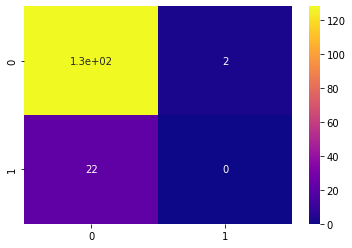

In [1536]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='plasma')
print(cm)
accuracy_score(y_test, y_pred)

## Applying k-Fold Cross Validation

In [1537]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.19 %
Standard Deviation: 0.93 %


## Applying Grid Search to find the best model and the best parameters

In [1538]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.41 %
Best Parameters: {'C': 0.75, 'gamma': 0.4, 'kernel': 'rbf'}
